# Data mining project about social media trends
### By Mateusz Rokita, Jakub Kwiatkowski and Krzysztof Szudy

This dataset offers a comprehensive overview of viral social media trends, from 2022 till 2024, across TikTok, Instagram, Twitter, and YouTube. It includes detailed information on popular hashtags, content formats, and user engagement metrics, enabling in-depth analysis of how digital trends evolve across platforms. The dataset consists of 5000 entries and it's taken from the Kaggle platform. With the inclusion of regional activity and influencer-generated content, this dataset is very well-suited for:

- Trend detection and forecasting

- Sentiment analysis and modeling

- Research on influencer marketing and digital communication strategies

In [31]:
import kagglehub

path = kagglehub.dataset_download("atharvasoundankar/viral-social-media-trends-and-engagement-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kobaa\.cache\kagglehub\datasets\atharvasoundankar\viral-social-media-trends-and-engagement-analysis\versions\2


In [32]:
import pandas as pd

path_file = path + "\\Viral_Social_Media_Trends.csv"

data = pd.read_csv(path_file)

data.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


# Description of the attributes:

**1. Post_ID (Nominal)**

Meaning: A unique identifier for each post.

Unit of Measurement: None (it is a string identifier).

Example: Post_1, Post_2.

**2. Platform (Nominal)**

Meaning: The social media platform where the post was made.

Unit of Measurement: None (categorical values).

Values: TikTok, Instagram, Twitter, YouTube.

**3. Hashtag (Nominal)**

Meaning: The hashtag associated with the post.

Unit of Measurement: None (categorical text).

Example: #Challenge, #Education, #Dance.

**4. Content_Type (Nominal)**

Meaning: The type of content shared in the post.

Unit of Measurement: None (categorical).

Values: Video, Shorts, Post.

**5. Region (Nominal)**

Meaning: The region or country where the post originated.

Unit of Measurement: None (categorical).

Example: UK, India, Brazil, Australia.

**6. Views (Numerical)**

Meaning: The total number of views the post has received.

Unit of Measurement: Count (number of views).

Example: 4163464, 4155940, 3666211.

**7. Likes (Numerical)**

Meaning: The total number of likes the post has received.

Unit of Measurement: Count (number of likes).

Example: 339431, 215240, 327143.

**8. Shares (Numerical)**

Meaning: The total number of shares the post has received.

Unit of Measurement: Count (number of shares).

Example: 53135, 65860, 39423.

**9. Comments (Numerical)**

Meaning: The total number of comments the post has received.

Unit of Measurement: Count (number of comments).

Example: 19346, 27239, 36223.

**10. Engagement_Level (Nominal)**

Meaning: The level of engagement the post has achieved based on the number of interactions (likes, shares, and comments).

Unit of Measurement: None (categorical).

Values: High, Medium, Low.

Let's perform some data cleaning, and visualize the possible outliers.

Post_ID             0.0
Platform            0.0
Hashtag             0.0
Content_Type        0.0
Region              0.0
Views               0.0
Likes               0.0
Shares              0.0
Comments            0.0
Engagement_Level    0.0
dtype: float64


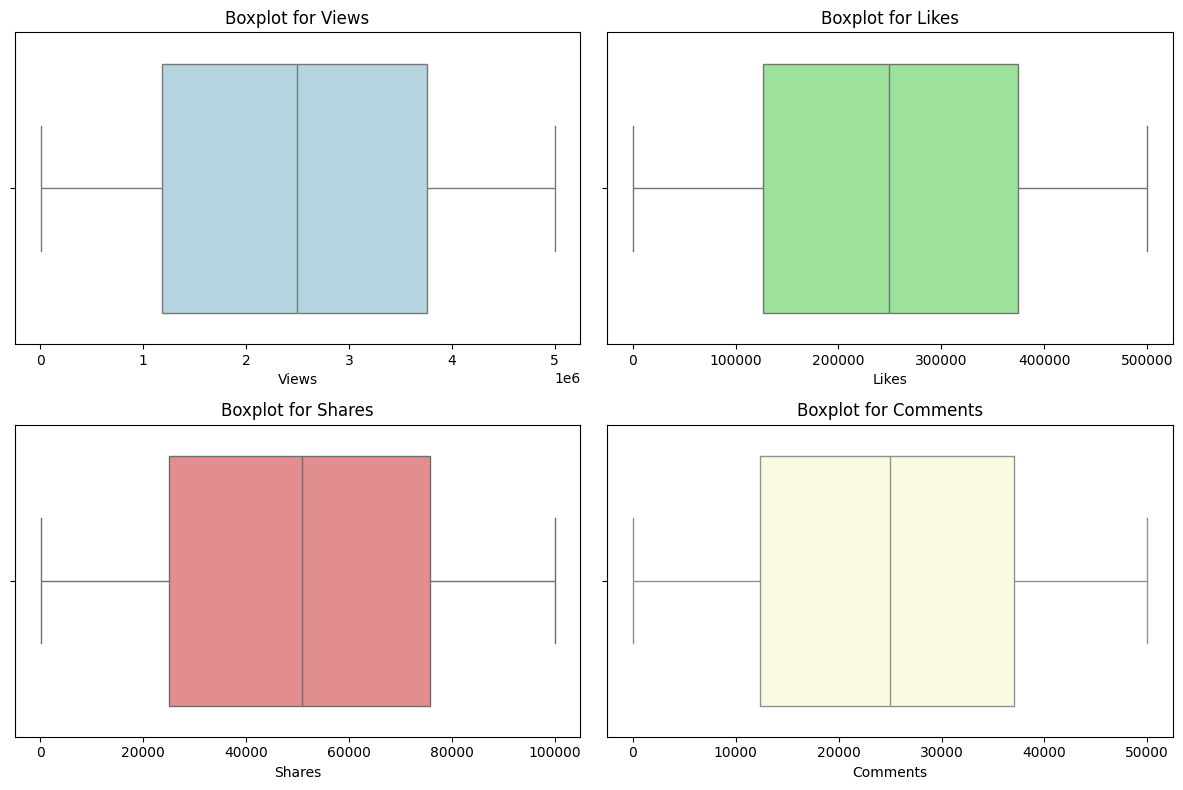

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and display missing data percentage
missing_percentage = data.isna().mean() * 100
print(missing_percentage)

# N/As dropping 
data.dropna(axis=1, how='all', inplace=True)
data.dropna(axis=0, how='any', inplace=True)
data.columns = data.columns.str.strip()

# Boxplot dla 'Views', 'Likes', 'Shares' i 'Comments'
plt.figure(figsize=(12, 8))

# Views
plt.subplot(2, 2, 1)
sns.boxplot(x=data['Views'], color='lightblue')
plt.title('Boxplot for Views')

# Likes
plt.subplot(2, 2, 2)
sns.boxplot(x=data['Likes'], color='lightgreen')
plt.title('Boxplot for Likes')

# Shares
plt.subplot(2, 2, 3)
sns.boxplot(x=data['Shares'], color='lightcoral')
plt.title('Boxplot for Shares')

# Comments
plt.subplot(2, 2, 4)
sns.boxplot(x=data['Comments'], color='lightyellow')
plt.title('Boxplot for Comments')

plt.tight_layout()
plt.show()


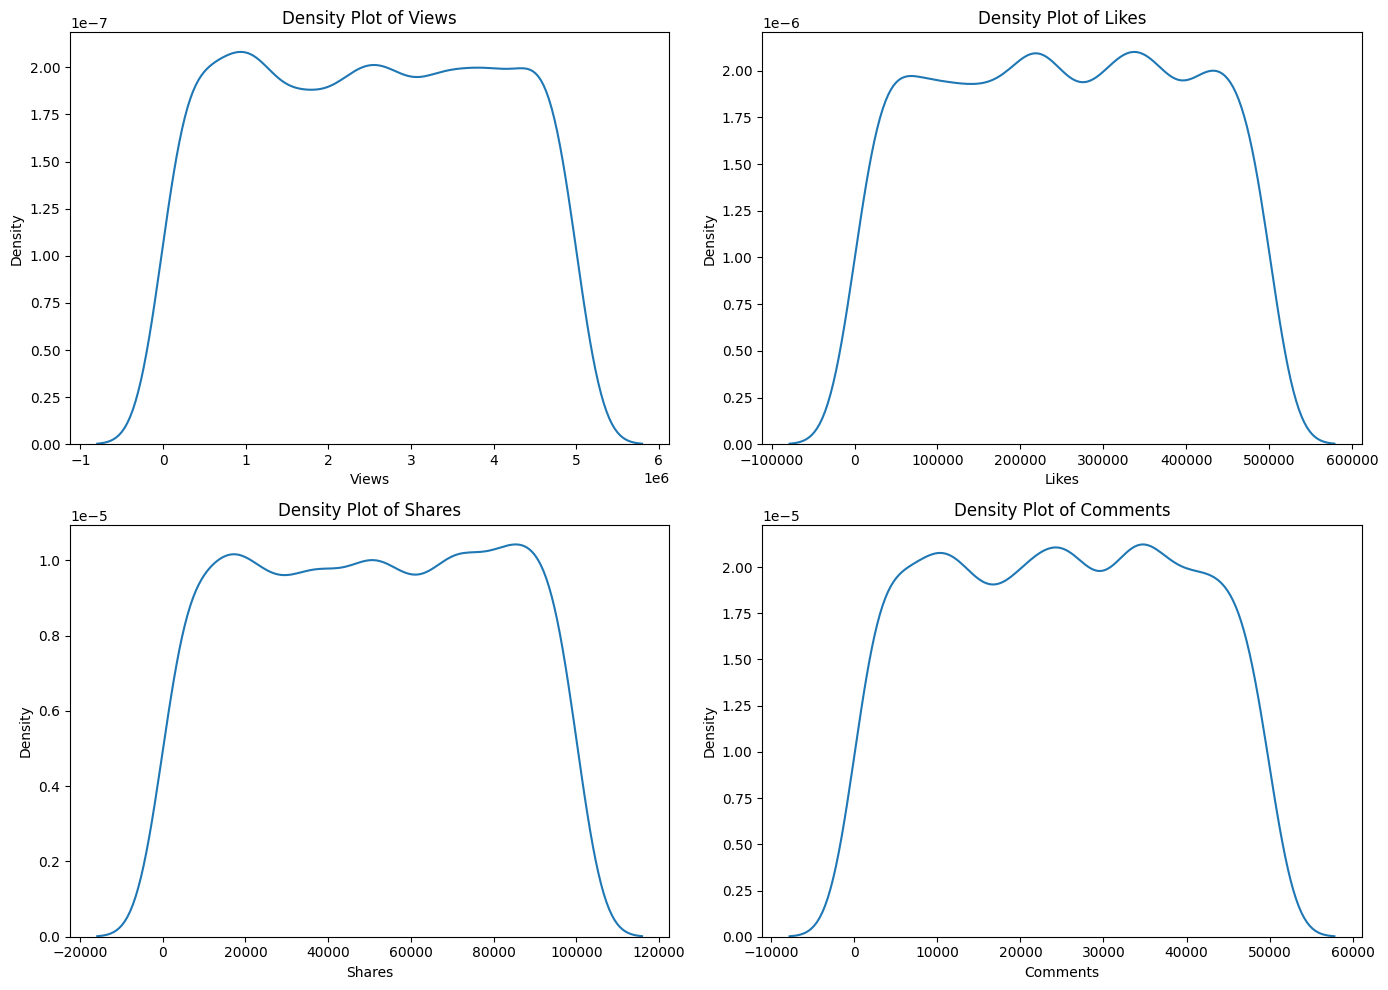

              Views          Likes        Shares      Comments
count  5.000000e+03    5000.000000   5000.000000   5000.000000
mean   2.494066e+06  251475.029800  50519.562000  24888.393800
std    1.459490e+06  144349.583384  29066.362671  14284.504319
min    1.266000e+03     490.000000     52.000000     18.000000
25%    1.186207e+06  126892.250000  25029.000000  12305.250000
50%    2.497373e+06  249443.000000  50839.500000  25004.000000
75%    3.759781e+06  373970.750000  75774.250000  37072.750000
max    4.999430e+06  499922.000000  99978.000000  49993.000000


In [34]:
# Plot density plots for Views, Likes, Shares, Comments
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.kdeplot(data['Views'], ax=axes[0, 0])
axes[0, 0].set_title('Density Plot of Views')

sns.kdeplot(data['Likes'], ax=axes[0, 1])
axes[0, 1].set_title('Density Plot of Likes')

sns.kdeplot(data['Shares'], ax=axes[1, 0])
axes[1, 0].set_title('Density Plot of Shares')

sns.kdeplot(data['Comments'], ax=axes[1, 1])
axes[1, 1].set_title('Density Plot of Comments')

plt.tight_layout()
plt.show()

# Simple statistics to detect outliers
print(data[['Views', 'Likes', 'Shares', 'Comments']].describe())

Data Integrity and unexpected values

In [35]:
# Check for unexpected categories
print("Platforms:", data['Platform'].unique())
print("Content Types:", data['Content_Type'].unique())
print("Regions:", data['Region'].unique())

# Check for negative values
print((data[['Views', 'Likes', 'Shares', 'Comments']] < 0).sum())

print("Sample Hashtags:", data['Hashtag'].dropna().sample(10))

Platforms: ['TikTok' 'Instagram' 'Twitter' 'YouTube']
Content Types: ['Video' 'Shorts' 'Post' 'Tweet' 'Live Stream' 'Reel']
Regions: ['UK' 'India' 'Brazil' 'Australia' 'Japan' 'Germany' 'Canada' 'USA']
Views       0
Likes       0
Shares      0
Comments    0
dtype: int64
Sample Hashtags: 4361      #Fashion
1202      #Fitness
2249    #Challenge
1265       #Comedy
1333      #Fitness
1040        #Viral
4713        #Music
1862        #Viral
581         #Viral
2356       #Gaming
Name: Hashtag, dtype: object


There are no unexpected categories or negative values and the hashtags look quite normal

Conclusion from the above figures is pretty simple, there is no sign of any bots or other phenomenas that would interfere our analysis. Alright, so after cleaning the data, seeing the possible outliers, we are able to intially visualize the data and its' distributions to see some trends, how everything is distributed and have a good starting point for next ideas. 

C:\Users\kobaa\AppData\Local\Temp\ipykernel_24784\3800310366.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Platform', palette=platform_colors)


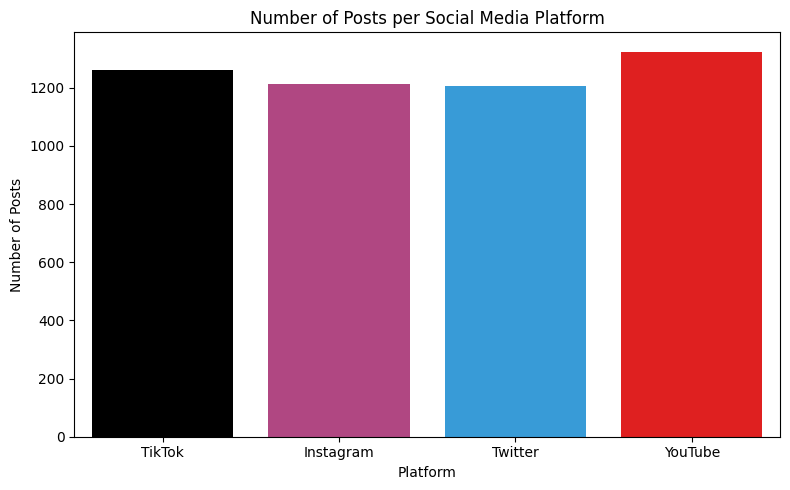

In [36]:
platform_colors = {
    'YouTube': '#FF0000',
    'Twitter': '#1DA1F2',
    'TikTok': '#000000',
    'Instagram': '#C13584'
}

engagement_colors = {
    'High': '#2ca02c',
    'Medium': '#ff7f0e',
    'Low': '#d62728'
}

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Platform', palette=platform_colors)
plt.title('Number of Posts per Social Media Platform')
plt.ylabel('Number of Posts')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()



Now we finally see where the most posts from our data source come from, the first interesting thing to think about is the distribution of likes, which somehow correspond to the popularity of each app since the engagement of users.

C:\Users\kobaa\AppData\Local\Temp\ipykernel_24784\1204289659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Platform', y='Likes', estimator='mean', palette=platform_colors)


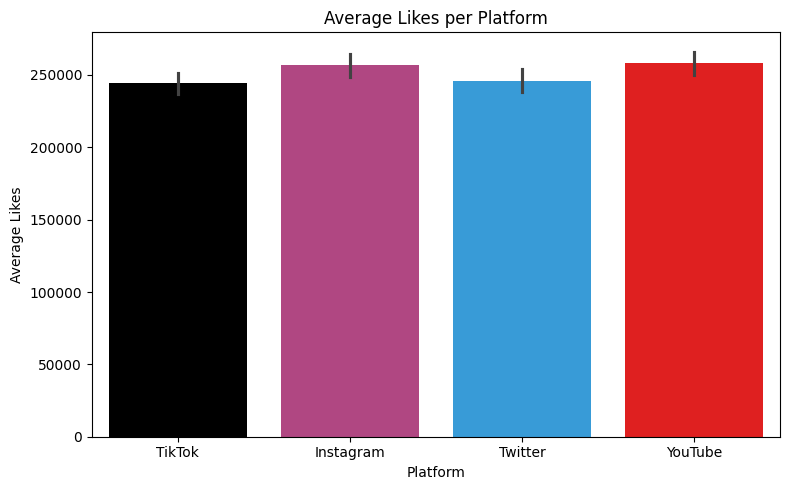

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Platform', y='Likes', estimator='mean', palette=platform_colors)
plt.title('Average Likes per Platform')
plt.ylabel('Average Likes')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()


Now, we see that YouTube and Instagram have the most engaged community... Maybe the next interesting thing to see is how does it look across different regions of the world? Which region is the most engaged?

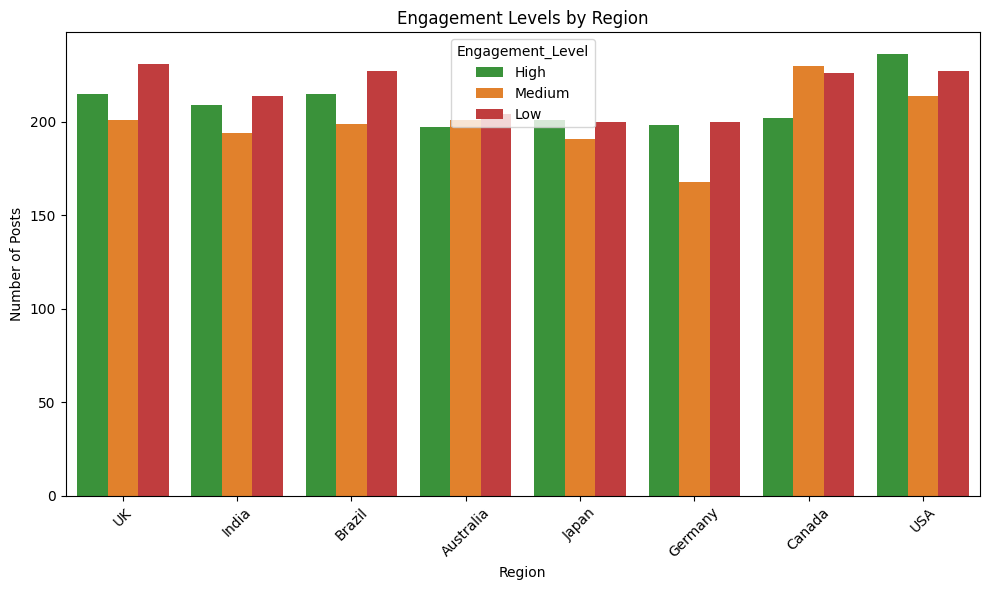

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Region', hue='Engagement_Level', palette=engagement_colors)
plt.title('Engagement Levels by Region')
plt.ylabel('Number of Posts')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


UK... a lot of posts, not too much engagement? What's the reason? It's not the topic for this type of analysis. Coming back to the topic, we can see that USA is very engaged in Social Medias, pretty predictable thing. Let's come to the more sophisticated thing, analysis of the correlation between attributes.

In [39]:
# mapping platform(Tiktok - 1, Instagram - 2, Twitter - 3, youtube - 4)
platform_mapping = {
    'TikTok': 1,
    'Instagram': 2,
    'Twitter': 3,
    'YouTube': 4
}
data['Platform_num'] = data['Platform'].map(platform_mapping)
#mapping content type (Video - 1, Shorts - 2, post - 3)
content_type_mapping = {
    'Video': 1,
    'Shorts': 2,
    'Post': 3
}
data['Content_Type_num'] = data['Content_Type'].map(content_type_mapping)
# mapping engagement_level (High -1, Medium - 2, Low - 3)
engagement_level_mapping = {
    'High': 1,
    'Medium': 2,
    'Low': 3
}
data['Engagement_Level_num'] = data['Engagement_Level'].map(engagement_level_mapping)


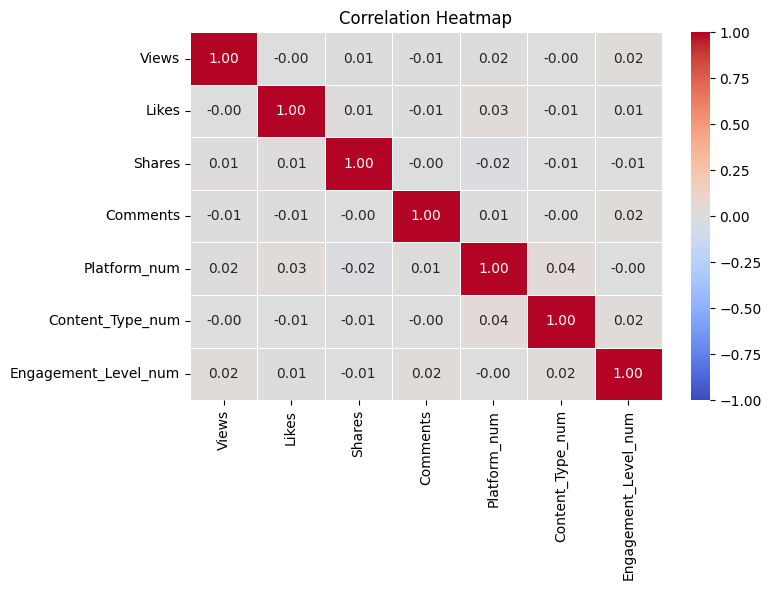

In [40]:
correlation_matrix = data[['Views', 'Likes', 'Shares', 'Comments', 'Platform_num','Content_Type_num','Engagement_Level_num']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


The attributes are not strongly correlated, these correlations marked with 0.01 show a little correlation what may make us understand a bit more, but the correlation as said before - is not very strong.

Based on the EDA the goals remain valid. The dataset is quite clean making it possible to predict engagement level, assign sentiment by hashtag and use segmentation for better understanding of influence strategies

# Second Part of project

## Data Preparation and Modeling Report

### Quick Review of Data Mining Goals

The main goal is to build a model that classifies posts into high or low engagement classes based on available features. This classification task aims to help understand which factors influence high engagement and to predict the engagement level of other potential post. Due to class imbalance in the data we use balancing techniques (SMOTE library) that improves model learning.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import numpy as np

In [42]:
def like_bucket(likes):
    return 'High' if likes >= 175000 else 'Low'

data['Like_Class'] = data['Likes'].apply(like_bucket)

X = data.drop(['Likes', 'Post_ID', 'Engagement_Level', 'Hashtag', 'Like_Class', 'Engagement_Level_num', 'Content_Type_num', 'Platform_num'], axis=1)
y = data['Like_Class']


categorical_cols = ['Platform', 'Content_Type', 'Region']
numeric_cols = ['Views', 'Shares', 'Comments']

# Create a preprocessor codes text columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Class balancing 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

clf = LogisticRegression(class_weight='balanced', max_iter=1000)


clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

        High       0.67      0.51      0.58       657
         Low       0.36      0.52      0.43       343

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.50      1000
weighted avg       0.57      0.52      0.53      1000



c:\Users\kobaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Now let's see how good it predicts the level of likes...

In [43]:
sample_post = pd.DataFrame({
    'Platform': ['YouTube'],      
    'Content_Type': ['Post'],     
    'Region': ['North America'],   
    'Views': [1500000],
    'Shares': [5000],
    'Comments': [5000],
})

sample_processed = preprocessor.transform(sample_post)
predicted_class = clf.predict(sample_processed)

print(f"Predicted class: {predicted_class[0]}")


Predicted class: Low


Short analysis of the features in terms of assigning to some particular class in the model

In [ ]:
# Get the names of all features after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Extract the coefficients from the trained model
coefficients = clf.coef_[0]

# Create a DataFrame with features and their coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Format coefficients to decimal
coef_df['Formatted_Coefficient'] = coef_df['Coefficient'].apply(lambda x: f"{x:.10f}")

# Sort by coefficient values
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)

print("Top 10 Features Increasing High Engagement Probability:")
print(coef_df_sorted[['Feature', 'Formatted_Coefficient']].head(10).to_string(index=False))


Top 10 Features Increasing High Engagement Probability:
                      Feature Formatted_Coefficient
          remainder__Comments          0.0000011989
             remainder__Views          0.0000000164
        cat__Platform_Twitter          0.0000000001
              cat__Region_USA          0.0000000001
     cat__Content_Type_Shorts          0.0000000001
         cat__Platform_TikTok          0.0000000001
cat__Content_Type_Live Stream          0.0000000000
           cat__Region_Canada          0.0000000000
       cat__Content_Type_Post          0.0000000000
          cat__Region_Germany          0.0000000000


We conclude that the most influential feature for being put in the "High" class are Comments and Views. 